* 1 Introduction 
* 2 Load and check data
    * 2.1 load data 
    * 2.2 Outlier detectio 
    * 2.3 join train and test set 
    * check for null and missing values 
* 3 Feature analysis 
    * 3.1 Numerical values 
    * 3.2 Categorical values 
* 4 Filling missing Values 
    * 4.1 Age 
* 5 Feature engineering 
    * 5.1 Name/Title 
    * 5.2 Family Size 
    * Cabin 
    * Ticket 
* Modeling 
    * 6.1 Simple modeling 
        * 6.1.1 Cross validate models 
        * 6.1.2 Hyperparmater tunning for best models 
        * 6.1.3 Plot learning curves 
        * 6.1.4 Feature importance of the tree based classifiers 
    * 6.2 Ensemble modeling 
        * 6.2.1 Combining models 
    * Prediction 
        * Predict and Submit results 

## 1.Intorduction
## This script follows three main parts
* Feature analysis
* Feature engineering
* Modeling

In [251]:
import numpy as np 
import pandas as pd 
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from collections import Counter 

### 2.Load and check data

In [252]:
# 2.1 Load data
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
IDtest = test['PassengerId']

In [253]:
# 2.2 outlier detection
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[col]<(Q1-outlier_step)) | (df[col]>(Q3+outlier_step))].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['SibSp', 'Parch', 'Fare'])
outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [254]:
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)

In [255]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
# 2.3 join train and test set 
train_len = len(train)
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [257]:
# 2.4 check for null and missing values
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [259]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1299.000000,881.000000,1299.000000,1043.000000,1299.000000,1299.000000,1298.000000
mean,657.093149,0.385925,2.294072,29.903806,0.452656,0.372594,32.569058
std,377.743244,0.487090,0.837150,14.427548,0.879416,0.857157,50.694652
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,331.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,657.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,984.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.646850
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 3. Feature analysis

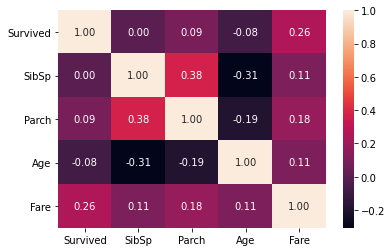

In [260]:
# 3.1 Numerical values
# correlation matrix between numberical values
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f')

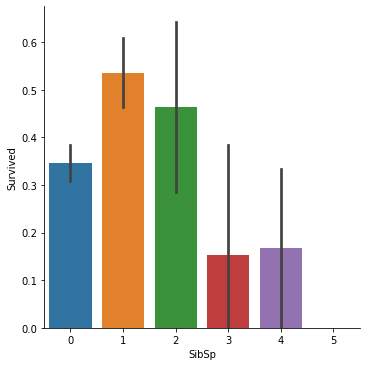

In [261]:
# SibSp
sns.catplot(x='SibSp', y='Survived', data=train, kind='bar')

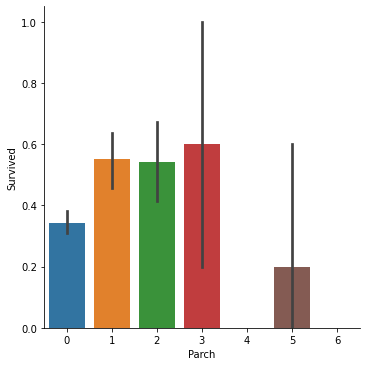

In [262]:
# Parch
sns.catplot(x='Parch', y='Survived', data=train, kind='bar')

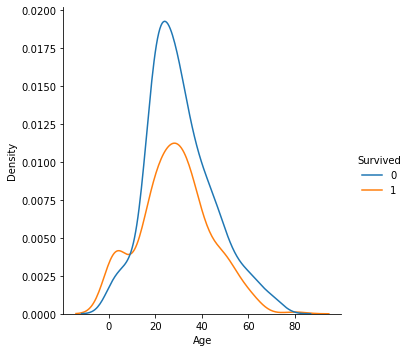

In [263]:
# Age
sns.displot(data=train, x='Age', hue='Survived', kind='kde')

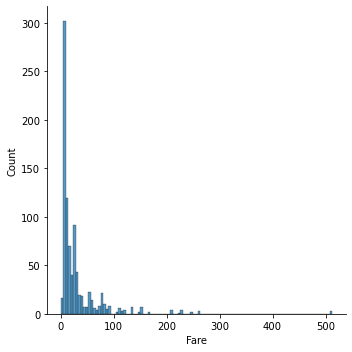

In [264]:
# Fare
sns.displot(data=train, x='Fare')

## 3.2 Categorial

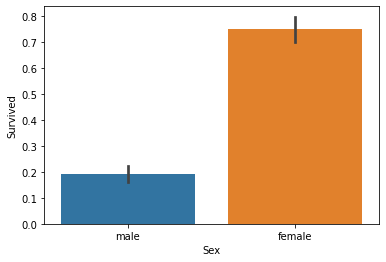

In [265]:
sns.barplot(data=train, x='Sex', y='Survived')

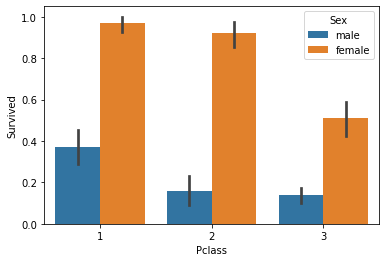

In [266]:
sns.barplot(data=train, x='Pclass', y='Survived', hue='Sex')

## 4. Fill missing value

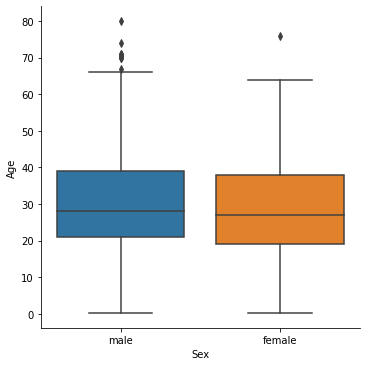

In [267]:
sns.catplot(data=dataset, y='Age', x='Sex', kind='box')

## 5.Feature engineer

In [268]:
# Name/Title 
dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

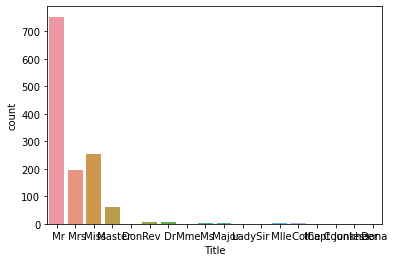

In [269]:
sns.countplot(data=dataset, x='Title')

In [270]:
dataset.drop(labels=['Name'], axis=1, inplace=True)

In [271]:
dataset.drop(labels=['PassengerId'], axis=1, inplace=True)

In [272]:
# Cabin
dataset['Cabin'].describe()

dataset['Cabin'] = dataset['Cabin'].apply(lambda x: 'X' if pd.isna(x) else x[:1])

In [273]:
# Ticket
dataset.drop(['Ticket'], axis=1, inplace=True)

In [274]:
# Age 
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [275]:
# Embark 
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [276]:
# Fare
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

In [277]:
# familysize 
dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']
dataset.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [278]:
dataset.isna().sum()

Survived      418
Pclass          0
Sex             0
Age             0
Fare            0
Cabin           0
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [279]:
dataset = pd.get_dummies(dataset)

## 6.Modeling

In [280]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
import xgboost 

In [281]:
tr = dataset[:train_len]
te = dataset[train_len:]
te.drop('Survived', axis=1, inplace=True)

D:\software\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [282]:
tr_y = tr['Survived'].astype(int)
tr_x = tr.drop('Survived', axis=1)

In [283]:
kfold = StratifiedKFold()
random_state = 42

In [284]:
Adaboost = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)
                              , random_state=random_state
                              , learning_rate=0.1)
cross_val_score(Adaboost, tr_x, tr_y, scoring='accuracy', cv=kfold, n_jobs=4)

array([0.72316384, 0.82386364, 0.80681818, 0.77272727, 0.8125    ])

In [285]:
gbdt = GradientBoostingClassifier()

cross_val_score(gbdt, tr_x, tr_y, scoring='accuracy', cv=kfold, n_jobs=4)

array([0.81920904, 0.8125    , 0.84090909, 0.81818182, 0.85227273])

In [221]:
GBC = GradientBoostingClassifier()
gb_param_grid = {
    'loss': ['deviance'],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth':[4,8],
    'min_samples_leaf':[100, 150],
    'max_features': [0.3, 0.1]
}
gsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfold, scoring='accuracy',
                    n_jobs=-1, verbose=1)
gsGBC.fit(tr_x, tr_y)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.1s finished


0.8240626605033384

<module 'matplotlib.pyplot' from 'D:\\software\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

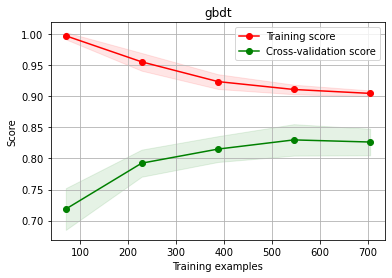

In [286]:
# plot learning curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=-1, train_sizes=np.linspace(.1, 1, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv
                                                           ,n_jobs=n_jobs
                                                           ,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_socres_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean-train_socres_std,
                    train_scores_mean+train_socres_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std,alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='best')
    return plt

plot_learning_curve(gbdt, 'gbdt', tr_x, tr_y, cv=kfold)

<module 'matplotlib.pyplot' from 'D:\\software\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

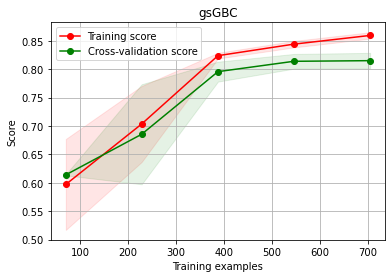

In [287]:
plot_learning_curve(gsGBC.best_estimator_, 'gsGBC', tr_x, tr_y, cv=kfold)

<module 'matplotlib.pyplot' from 'D:\\software\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

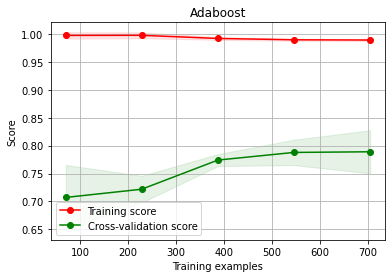

In [288]:
plot_learning_curve(Adaboost, 'Adaboost', tr_x, tr_y, cv=kfold)

In [289]:
# gridsearch 参数选择
GBDT = GradientBoostingClassifier()
gbdt_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.1],
    'max_depth': [3, 4, 5],
}
gsGBDT = GridSearchCV(GBDT, param_grid=gbdt_params, cv=kfold, scoring='accuracy')
gsGBDT.fit(tr_x, tr_y)
GBDT_best = gsGBDT.best_estimator_
gsGBDT.best_score_

0.8376861838726246

In [290]:
Adaboost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   learning_rate=0.1, random_state=42)

In [294]:
test_Survived = pd.Series(gsGBDT.best_estimator_.predict(te), name='Survived')
# test_Survived = pd.Series(Adaboost.predict(te), name='Survived')
res = pd.concat([IDtest, test_Survived], axis=1)
res.to_csv('sub_2021_07_28_02.csv', index=False)

In [300]:
from xgboost import XGBRFClassifier